# Übungsblatt 5

Lernziele:
- Klassifikation mit Entscheidungsbäumen und CART-Algorithmus



In [1]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'X', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # transform labels into numbers
    le = preprocessing.LabelEncoder()
    le.fit(y)

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = le.transform(Z)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [2]:
import pandas as pd
import numpy as np

Schritt 1: Lesen Sie die Trainings-Daten aus 'data/2d_samples.csv' ein!

In [3]:
df = pd.read_csv("data/2d_samples.csv")
df

,x1,x2,Label
0,30.5905,11.30740,A
1,28.6456,10.42340,A
2,28.2756,10.18550,A
3,25.9744,8.50403,A
4,28.5634,10.92670,A
...,...,...,...
1495,29.6511,9.23666,B
1496,31.9667,10.39530,B
1497,31.4926,9.90862,B
1498,27.8434,8.92265,B


Schritt 2: Trainieren Sie einen Entscheidungsbaum. Verwenden Sie hierbei das Modul SciKit Learn (sklearn). Überprüfen Sie den Klassifikator, indem Sie die Muster der Trainingsstichprobe klassifizieren.

In [4]:
from sklearn import tree

In [5]:
classifier = tree.DecisionTreeClassifier()
classifier

DecisionTreeClassifier()

In [6]:
classifier.fit(df[ ["x1", "x2"] ].values, df["Label"].values) 

DecisionTreeClassifier()

In [7]:
classifier.predict(df[ ["x1", "x2"] ].values)

array(['A', 'A', 'A', ..., 'B', 'B', 'B'], dtype=object)

In [8]:
correct = np.sum(classifier.predict(df[ ["x1", "x2"] ].values) == df["Label"].values)
num_samples = len(df)
print(f"Number of samples: {num_samples}; Correct classified: {correct}") 

Number of samples: 1500; Correct classified: 1500


Schritt 3: Plotten Sie das Ergebnis der Klassifikation mit Hilfe der oben zur Verfügung gestellten Funktion *plot_decision_regions()*

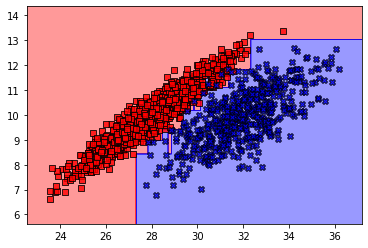

In [9]:
plot_decision_regions(df[ ["x1", "x2"] ].values, df["Label"].values, classifier)